# Sebastian Schwab

> EE 399 HW 2 [https://github.com/sebschwab/ML-Training/tree/bf31c2d0b7c5b1fb61cf77fd7059c40e106706a6/project%202]

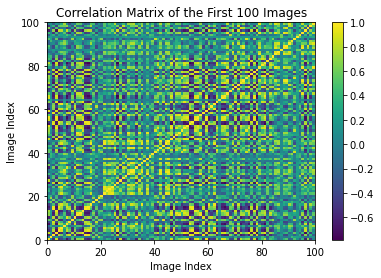

In [22]:
# Part I
# Import and read in file
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
results=loadmat('yalefaces.mat')
X=results['X']

# Extract the first 100 images from the matrix X
X_100 = X[:, :100]

# Compute the correlation matrix
C = np.corrcoef(X_100.T)

# Plot the correlation matrix
plt.pcolor(C)
plt.colorbar()
plt.title('Correlation Matrix of the First 100 Images')
plt.xlabel('Image Index')
plt.ylabel('Image Index')
plt.show()

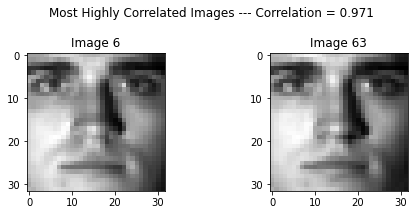

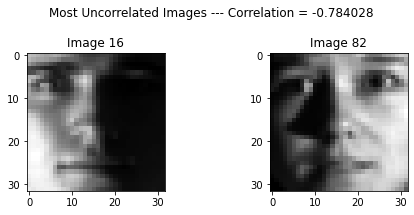

In [23]:
# Part II

# set diagonal elements to zero
np.fill_diagonal(C, 0)
# find the indices of the most highly correlated
max_idx = np.unravel_index(np.argmax(C), C.shape)

# set diagonal elements to 100000
np.fill_diagonal(C, 100000)
# find the indices of the most highly uncorrelated
min_idx = np.unravel_index(np.argmin(C), C.shape)

# plot the most highly correlated images
plt.figure(figsize=(7,3))
plt.subplot(1,2,1)
plt.imshow(X[:,max_idx[0]].reshape(32, 32), cmap='gray')
plt.title(f"Image {max_idx[0]+1}")
plt.subplot(1,2,2)
plt.imshow(X[:,max_idx[1]].reshape(32, 32), cmap='gray')
plt.title(f"Image {max_idx[1]+1}")
plt.suptitle(f"Most Highly Correlated Images --- Correlation = {C[max_idx[0]][max_idx[1]]:.3f}")
plt.tight_layout()

# plot the most uncorrelated images
plt.figure(figsize=(7,3))
plt.subplot(1,2,1)
plt.imshow(X[:,min_idx[0]].reshape(32, 32), cmap='gray')
plt.title(f"Image {min_idx[0]+1}")
plt.subplot(1,2,2)
plt.imshow(X[:,min_idx[1]].reshape(32, 32), cmap='gray')
plt.title(f"Image {min_idx[1]+1}")
plt.suptitle(f"Most Uncorrelated Images --- Correlation = {C[min_idx[0]][min_idx[1]]:4f}")
plt.tight_layout()
plt.show()


C:\Users\seb1s\AppData\Local\Temp\ipykernel_17140\3227745972.py:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


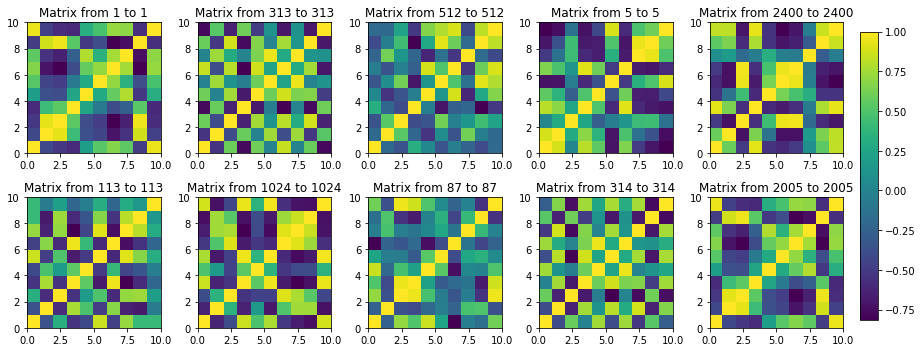

In [24]:
# Part III

values = [1, 313, 512, 5, 2400, 113, 1024, 87, 314, 2005]

fig, axs = plt.subplots(2, 5, figsize=(12, 5))
k = 0
for i in range(2):
    for j in range(5):
        # Extract the first 100 images from the matrix X
        X_10 = X[:, values[k]-1:values[k]+9]

        # Compute the correlation matrix
        C = np.corrcoef(X_10.T)
        
        value = i *j
        axs[i, j].pcolor(C)
        axs[i, j].set_title(f'Matrix from {values[k]} to {values[k]}')
        k += 1
        
        
# Create a single subplot to hold the colorbar
cax = fig.add_axes([1, 0.1, 0.02, 0.8])
        
# Plot the colorbar
plt.colorbar(axs[0, 0].pcolor(C), cax=cax)

plt.tight_layout()
plt.show()

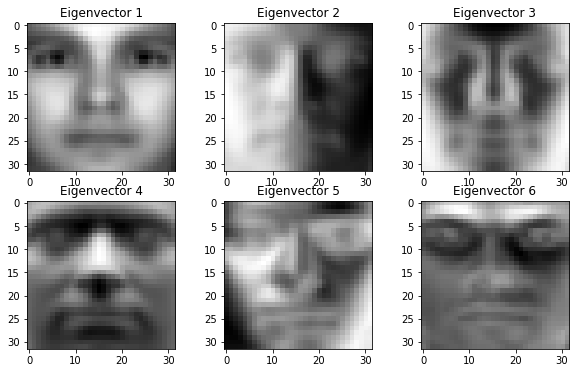

In [25]:
# part IV
# Create the matrix Y = XXT
Y = np.dot(X, X.T)

# Find the eigenvectors and eigenvalues of Y
eigenvalues, eigenvectors = np.linalg.eig(Y)

# Sort the eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Select the first six eigenvectors with the largest magnitude eigenvalue
U6 = sorted_eigenvectors[:, :6]

# Reshape each eigenvector as a 32x32 image and display it
fig, axs = plt.subplots(2, 3, figsize=(10, 6))
for i in range(2):
    for j in range(3):
        k = i * 3 + j
        axs[i, j].imshow(U6[:, k].reshape(32, 32), cmap='gray')
        axs[i, j].set_title(f'Eigenvector {k+1}')
plt.show()

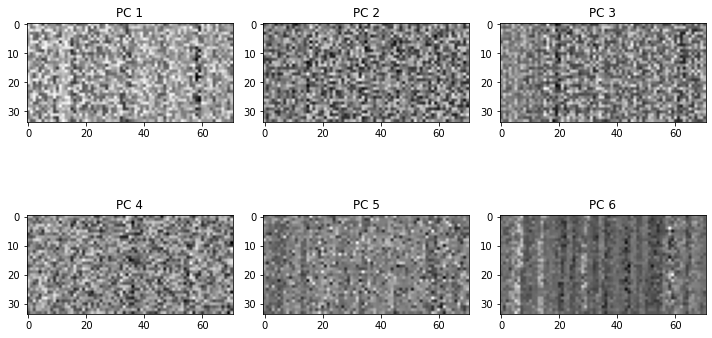

In [26]:
# Part V
# SVD the matrix X
U_svd, S, Vt = np.linalg.svd(X, full_matrices=False)

# Find the first six principal component directions
PC = Vt[:6, :]

# Visualize the principal components
fig, axs = plt.subplots(2, 3, figsize=(10, 6))
for i, ax in enumerate(axs.flatten()):
    pc_img = PC[i, :].reshape(71, 34).T
    ax.imshow(pc_img, cmap='gray')
    ax.set_title(f'PC {i+1}')
plt.tight_layout()
plt.show()

In [27]:
# Part VI

# Compare the first eigenvector v1 with the first SVD mode u1
u1 = U_svd[:, 0]
v1 = U6[:, 0]
diff_norm = np.linalg.norm(np.abs(v1) - np.abs(u1))

print('Norm of difference between v1 and u1:', diff_norm)

Norm of difference between v1 and u1: 1.0550898498448675e-15


Percentage of variance captured by each of the first 6 modes:
Mode 1: 72.93%
Mode 2: 15.28%
Mode 3: 2.57%
Mode 4: 1.88%
Mode 5: 0.64%
Mode 6: 0.59%


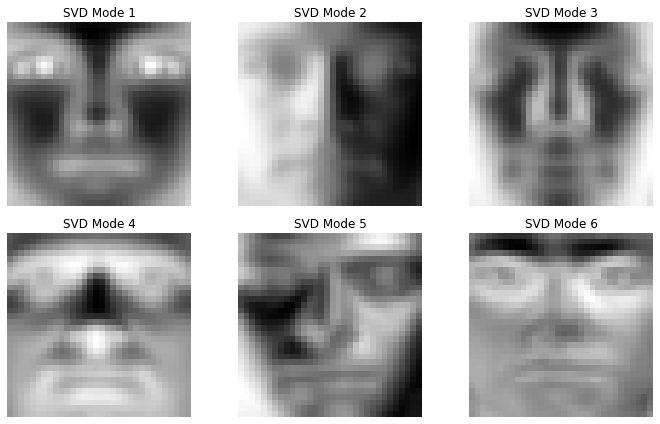

In [28]:
# Part VII

# Compute the SVD
U, S, Vt = np.linalg.svd(X)

# Compute the total variance
total_var = np.sum(X**2)

# Compute the variance captured by each mode
var_captured = (S**2) / total_var

# Compute the percentage of variance captured by each mode
percent_var_captured = var_captured * 100

# Print the percentages of variance captured by the first 6 modes
print('Percentage of variance captured by each of the first 6 modes:')
for i in range(6):
    print('Mode {}: {:.2f}%'.format(i+1, percent_var_captured[i]))

# Plot the first 6 SVD modes
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
for i, ax in enumerate(axes.flat, start=1):
    mode_image = U_svd[:, i - 1].reshape(32, 32)
    ax.imshow(mode_image, cmap='gray')
    ax.set_title(f"SVD Mode {i}")
    ax.axis('off')

plt.tight_layout()
plt.show()
